In [1]:
!nvidia-smi

Mon Aug 14 16:43:23 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.94                 Driver Version: 384.94                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 105... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   36C    P8    N/A /  N/A |     77MiB /  4096MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
%matplotlib inline

In [3]:
import sys
from time import time

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras import backend as K
from keras.backend.tensorflow_backend import set_session
from keras.datasets import mnist

sys.path.append('..')
from cardio.models.autoencoder import Autoencoder, VariationalAutoencoder

Using TensorFlow backend.


In [4]:
sns.set()

#### Session config

In [5]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [6]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth=True
set_session(tf.Session(config=config))

#### Plot utils

In [7]:
def plot_hist(hist):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(hist.history["loss"], "r", label="train loss")
    val_loss = hist.history.get("val_loss")
    if val_loss is not None:
        plt.plot(val_loss, "b", label="validation loss")
    plt.legend()
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.show()

In [8]:
def plot_predictions(model, data):
    pred = model.predict(data)
    n = len(data)
    plt.figure(figsize=(2 * n, 4))
    plt.gray()
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(data[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(pred[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

#### Data loading

In [9]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#### Fit constants

In [10]:
N_EPOCHS = 1000
BATCH_SIZE = 5000

#### Autoencoder

In [11]:
ae = Autoencoder((28, 28), [256, 64, 16], "relu", "sigmoid")
ae.compile(optimizer="adam", loss="binary_crossentropy")

In [12]:
t = time()
hist = ae.fit(x_train, validation_data=x_test,
              epochs=N_EPOCHS, batch_size=BATCH_SIZE,
              shuffle=True, verbose=0)
print("Elapsed time: {0:.2f} seconds".format(time() - t))

Elapsed time: 693.12 seconds


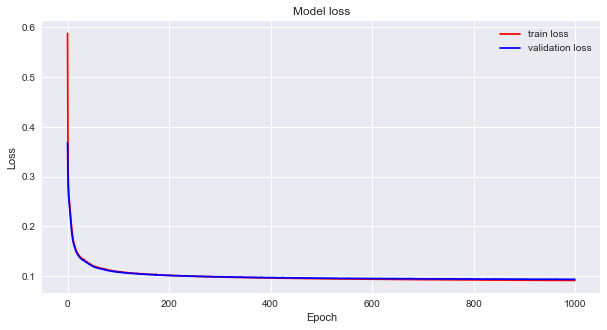

In [13]:
plot_hist(hist)

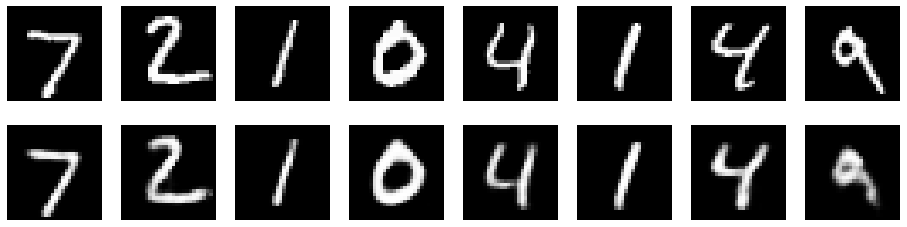

In [14]:
plot_predictions(ae, x_test[:8])

### Variational Autoencoder

In [15]:
vae = VariationalAutoencoder((28, 28), [256, 64, 16], "relu")
vae.compile(optimizer="adam")

In [16]:
t = time()
hist = vae.fit(x_train, validation_data=x_test,
               epochs=N_EPOCHS, batch_size=BATCH_SIZE,
               shuffle=True, verbose=0)
print("Elapsed time: {0:.2f} seconds".format(time() - t))

Elapsed time: 702.55 seconds


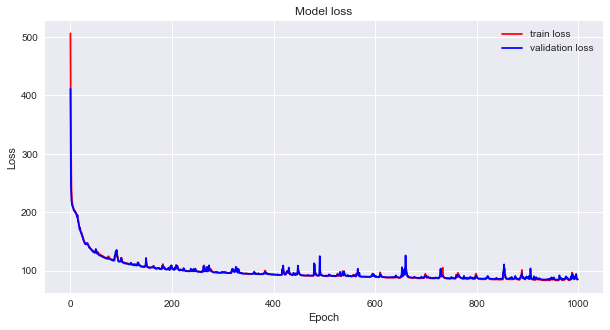

In [17]:
plot_hist(hist)

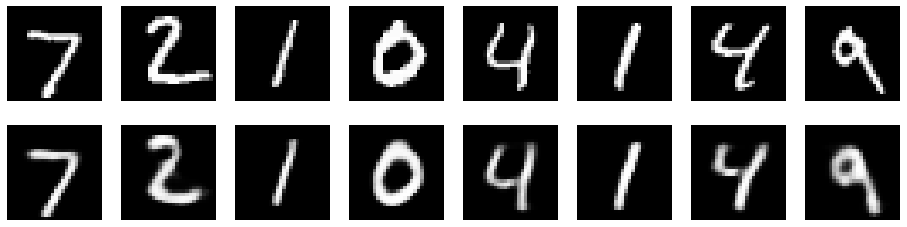

In [18]:
plot_predictions(vae, x_test[:8])